<a href="https://colab.research.google.com/github/Amarsinh0/MY-NOTES/blob/main/MY_NOTES_K_M_EDA_PART_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from scipy import stats
import statistics as stat

* lets starts with some simplye data in list form



---
1) find t - value 

---
2) find p -value

---







**f statstics:**
linK:---- https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/


In [12]:
edu_partialhighschool=[30000,10000,10000,20000,70000,30000,10000,20000,10000,30000]
edu_highschool=[20000,30000,60000,20000,40000,60000,60000]
edu_partialcollege=[60000,40000,30000,130000,60000,40000]
edu_bachelors=[40000,20000,90000,120000,60000,130000,20000,100000,80000,30000,100000,120000]
edu_graduate=[160000,50000,80000,30000,40000,80000,130000,100000,130000,50000,130000]

print('partialhighschool: '    + str(int(stat.mean(edu_partialhighschool))))
print('highschool:        '    + str(int(stat.mean(edu_highschool))))
print('partialcollege:    '    + str(int(stat.mean(edu_partialcollege))))
print('bachelors:         '    + str(int(stat.mean(edu_bachelors))))
print('graduate:          '    + str(int(stat.mean(edu_graduate))))

partialhighschool: 24000
highschool:        41428
partialcollege:    60000
bachelors:         75833
graduate:          89090


In [15]:
t,p=stats.ttest_ind(edu_partialhighschool,edu_highschool)
print(f't-value: {t}')
print(f'p-value: {p}')

t-value: -1.9131753750607223
p-value: 0.07500898731578687


<ipython-input-17-5141c840e2b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_partialhighschool,label='partialhighschool')
<ipython-input-17-5141c840e2b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_highschool,label='highschool')


<Axes: ylabel='Density'>

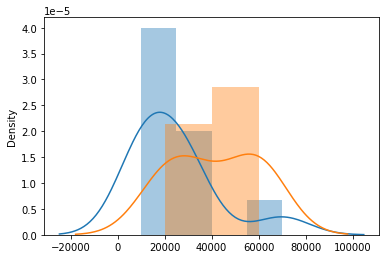

In [17]:
import seaborn as sns
sns.distplot(edu_partialhighschool,label='partialhighschool')          # distribution ploting 
sns.distplot(edu_highschool,label='highschool')


<ipython-input-24-3fd8981a4b1c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_partialhighschool,label='partialhighschool')
<ipython-input-24-3fd8981a4b1c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_highschool,label='highschool')
<ipython-input-24-3fd8981a4b1c>:5: UserWarning: 



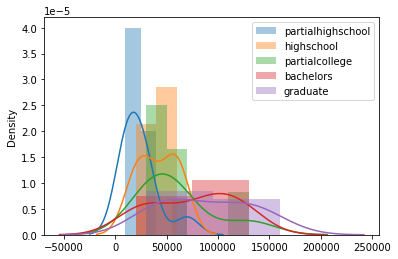

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(edu_partialhighschool,label='partialhighschool')
sns.distplot(edu_highschool,label='highschool')
sns.distplot(edu_partialcollege,label='partialcollege')
sns.distplot(edu_bachelors,label='bachelors')
sns.distplot(edu_graduate,label='graduate')
plt.legend()

In [27]:
f,p=stats.f_oneway(edu_bachelors,edu_graduate,edu_highschool,edu_partialcollege,edu_partialhighschool)
print(f'f-value : {f}')
print(f'p-value : {p}')

f-value : 5.778065095961635
p-value : 0.0008781084858501968


**The F Value in ANOVA**

---


The F value in one way ANOVA is a tool to help you answer the question “Is the variance between the means of two populations significantly different?” The F value in the ANOVA test also determines the P value; The P value is the probability of getting a result at least as extreme as the one that was actually observed, given that the null hypothesis is true.

---



The p value is a probability, while the f ratio is a test statistic, calculated as:

F value = variance of the group means (Mean Square Between) / mean of the within group variances (Mean Squared Error)

In [28]:
import pandas as pd
import numpy as np
from scipy import stats


In [31]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
col='smoker'
label='charges'

groups=df[col].unique()
#print(groups)     
                                    #o/p ---'yes' 'no'
df_grouped=df.groupby(col)
#print(df_grouped)         
                                    # group by() : for sort the dataframe in current catagorical column
group_labels=[]
for g in groups:
  g_list=df_grouped.get_group(g)    #  use the get_group() function see to return a list contaning only the records for each unique values
  #print(g_list)                     to understant get_group() read below information
  group_labels.append(g_list[label])# use append() function to store of label value
#print(group_labels)    


oneway= stats.f_oneway(*group_labels)   # * sign is way of dynamically adding every group in list of lists  

f= oneway[0]
p= oneway[1]

print('f: '+ str(round(f,3)))
print('p: '+ str(round(p,3)))

f: 2177.615
p: 0.0


**what is f-test ?**

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/f-test/



**Get Groups**:  df_grouped.get_group(g)

---

*italicized text*
The pandas GroupBy method get_group() is used to select or extract only one group from the GroupBy object.

For example, suppose you want to see the contents of ‘Healthcare’ group. This can be done in the simplest way as below.

df_group.get_group('Healthcare')

pandas group by get_group() | Image by Author
As you see, there is no change in the structure of the dataset and still you get all the records where product category is ‘Healthcare’.

I have an interesting use-case for this method — Slicing a DataFrame

Suppose, you want to select all the rows where Product Category is ‘Home’. A simple and widely used method is to use bracket notation [ ] like below,

df[df["Product_Category"]=='Home']
And nothing wrong in that. But you can get exactly same results with the method .get_group() as below,

df_group = df.groupby("Product_Category")
df_group.get_group('Home')
A step further, when you compare the performance between these two methods and run them 1000 times each, certainly .get_group() is time-efficient. ✅